In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from model_helper import *

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

main = pd.read_pickle("../clean_main.df")
splitDate = pd.to_datetime("1998-07-19")
main = main.loc[main.date >= splitDate]

42

In [2]:
for i in range(main.shape[1]):
    print(main.columns[i])

race_id
horse_no
horse_id
result
won
lengths_behind
horse_age
horse_country
horse_type
horse_rating
horse_gear
declared_weight
actual_weight
draw
position_sec1
position_sec2
position_sec3
position_sec4
position_sec5
position_sec6
behind_sec1
behind_sec2
behind_sec3
behind_sec4
behind_sec5
behind_sec6
time1
time2
time3
time4
time5
time6
finish_time
win_odds
place_odds
trainer_id
jockey_id
date
venue
race_no
config
surface
distance
going
horse_ratings
prize
race_class
sec_time1
sec_time2
sec_time3
sec_time4
sec_time5
sec_time6
sec_time7
lead_time1
lead_time2
lead_time3
lead_time4
lead_time5
lead_time6
lead_time7
place_combination1
place_combination2
place_combination3
place_combination4
place_dividend1
place_dividend2
place_dividend3
place_dividend4
win_combination1
win_dividend1
win_combination2
win_dividend2
num_of_horses
horse_win_percent
trainer_win_percent
speed_rating_1
track_variant
speed_rating
jockey_win_percent
days_since_last_run
average_speed_rating
last_speed_rating
best_sur

0.22
0.19333333333333333
0.232
0.22162883845126835
0.22696929238985314
0.24566088117489987
0.20694259012016022
Average Win Percent: 0.2209335622099307


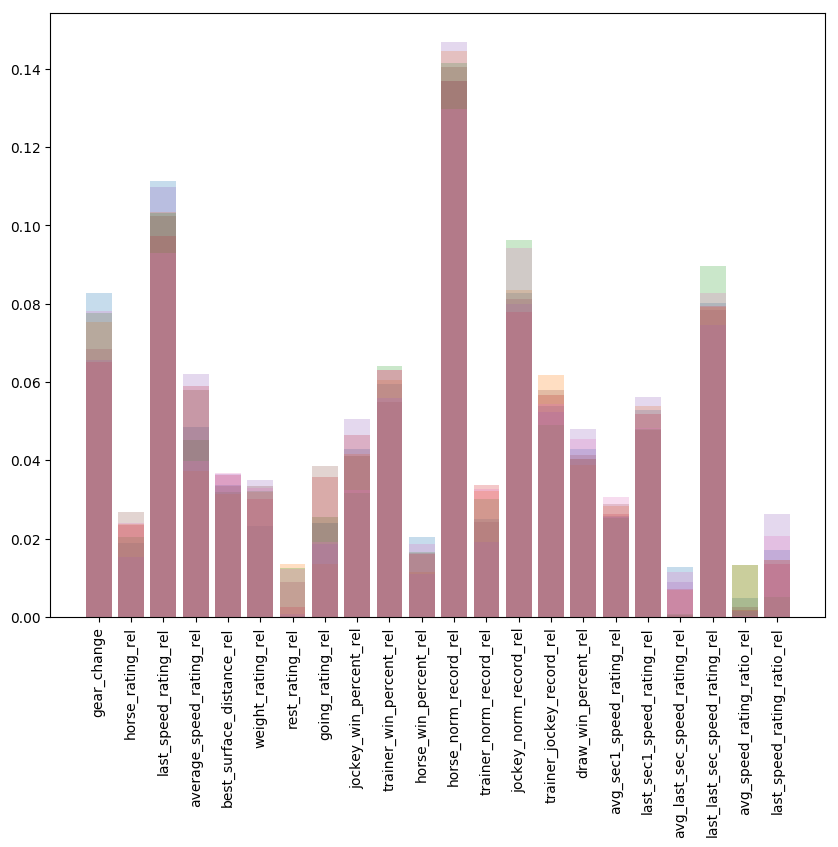

In [24]:
FEATURES = ["gear_change", 
            "horse_rating_rel", "last_speed_rating_rel", "average_speed_rating_rel",
            "best_surface_distance_rel", "weight_rating_rel", 
            "rest_rating_rel", 
            "going_rating_rel",
            "jockey_win_percent_rel", "trainer_win_percent_rel", "horse_win_percent_rel",
            "horse_norm_record_rel", "trainer_norm_record_rel", "jockey_norm_record_rel", 
            "trainer_jockey_record_rel", "draw_win_percent_rel",
            "avg_sec1_speed_rating_rel", "last_sec1_speed_rating_rel",
            "avg_last_sec_speed_rating_rel", "last_last_sec_speed_rating_rel",
            "avg_speed_rating_ratio_rel", "last_speed_rating_ratio_rel"
           ]

TARGET = "won"

plt.figure(figsize=(10,8), dpi=100) 
ms = []
cross_val_folds = 7
winAvg = 0
for training, testing in getCrossVal(main, cross_val_folds):
    model = LogisticRegression(max_iter=2000)
    X_train = training[FEATURES]
    y_train = training[TARGET]
    X_test = testing[FEATURES]
    y_test = testing[TARGET]
    
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    
    LR_importance = abs(model.coef_)[0]
    normal_LR = [val / float(sum(LR_importance)) for val in LR_importance]
    plt.bar(range(len(FEATURES)), normal_LR, label="Logistic Regression", alpha=0.25)
    plt.xticks(range(len(FEATURES)), FEATURES, rotation=90)
    preds_sep = [i for _, i in model.predict_proba(X_test)]
    
    race_sizes = [testing.loc[testing["race_id"]==r].shape[0] for r in np.unique(testing["race_id"])]
    
    count = 0
    won = 0 
    
    for race_size in race_sizes:
        lowI = count
        highI = count + race_size
        
        p = preds_sep[lowI:highI]
        act = testing.iloc[lowI:highI, :]
        prediction = np.argmax(p)
        result = np.argmax(act["won"])
        
        if prediction == result:
            won += 1
        count += race_size
    
    winPct = won/float(len(race_sizes))
    winAvg += winPct 
    print(winPct)
    
    #m = betSim_1(preds, testing, minBetSize=0.5, maxBetSize=5, startMoney=100)
    #m = betSim_3(preds, testing)
    #ms.append(m)
    
print("Average Win Percent:", winAvg/cross_val_folds)
    
# plt.figure(figsize=(8,6), dpi=100)
# #for m in ms:
#     plt.plot(m)
    
# All features: 220
# Without speed ratios: 225
# With gear change: 223
# Everything: 223
# Without ratios, rest :

In [5]:
# SPARE CODE

#     race_sizes = [testing.loc[testing["race_id"]==r].shape[0] for r in np.unique(testing["race_id"])]
    
#     count = 0
#     won = 0 
#     for race_size in race_sizes:
#         lowI = count
#         highI = count + race_size
        
#         p = preds[lowI:highI]
#         act = testing.iloc[lowI:highI, :]
#         prediction = np.argmax(p)
#         result = np.argmax(act["won"])
        
#         if prediction == result:
#             won += 1
#         count += race_size
            
#     print(won/float(len(race_sizes)))


    #LR_importance = abs(model.coef_)[0]
    #normal_LR = [val / float(sum(LR_importance)) for val in LR_importance]
#     plt.bar(range(len(FEATURES)), normal_LR, label="Logistic Regression")
#     plt.xticks(range(len(FEATURES)), FEATURES, rotation=90)
#     preds = [i for _, i in model.predict_proba(X_test)]
    

#     # Now we rank accordingly
#     winCount = 0
#     for race_id in races:
        
#         raceI = list(testing.loc[testing["race_id"]==race_id].index)
        
#         temp_preds = preds[raceI]
#         temp_act = y_test.iloc[raceI]
        
#         predWinner = np.argmin(temp_preds, axis=0)
#         actWinner = np.argmin(temp_act, axis=0)
        
#         if predWinner == actWinner:
#             winCount += 1
            
#     print("Win percent = {:.3f}".format(float(winCount)/len(races)))
    
    
# RSQUARED ANALYSIS
# plt.figure(figsize=(10,8), dpi=100)
# for training, testing in getCrossVal(main, 5):
#     model = LogisticRegression(max_iter=5000)
#     X_train = training[FEATURES]
#     y_train = training[TARGET]
#     X_test = testing[FEATURES]
#     y_test = testing[TARGET]
    
#     model.fit(X_train, y_train)
#     pred_probs = pd.Series([i for _, i in model.predict_proba(X_test)])
#     oddsPreds = oddsProbs(testing)
#     oddsRsq = RSq(oddsPreds, testing, a=1,b=0)
    
#     modelRsq = RSq(pred_probs, testing, a=1,b=0)
#     oddsReliance = 0.1
#     combinedModelRsq = RSq(pred_probs, testing, a=1-oddsReliance, b=oddsReliance)
    
#     print("Odds RSq:", oddsRsq)
#     print("Model RSq:", modelRsq)
#     print("Combined RSq:", combinedModelRsq)
#     print("Delta RSq of Combined:", combinedModelRsq - oddsRsq)
    
#     final_probs = combineProbs(pred_probs, testing, a=1-oddsReliance, b=oddsReliance)
#     #m = betSim_2(final_probs, testing, startMoney=100, minProb=0.07)
#     #plt.plot(m)
#     print("Accuracy: {}".format(winnerEval(final_probs, y_test, testing)))
#     print()